# Task 2: Customer Segmentation


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Reading

In [48]:
data= pd.read_csv("C:\\Users\\Abdel\\PycharmProjects\\ Customer Segmentation\\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [49]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [50]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


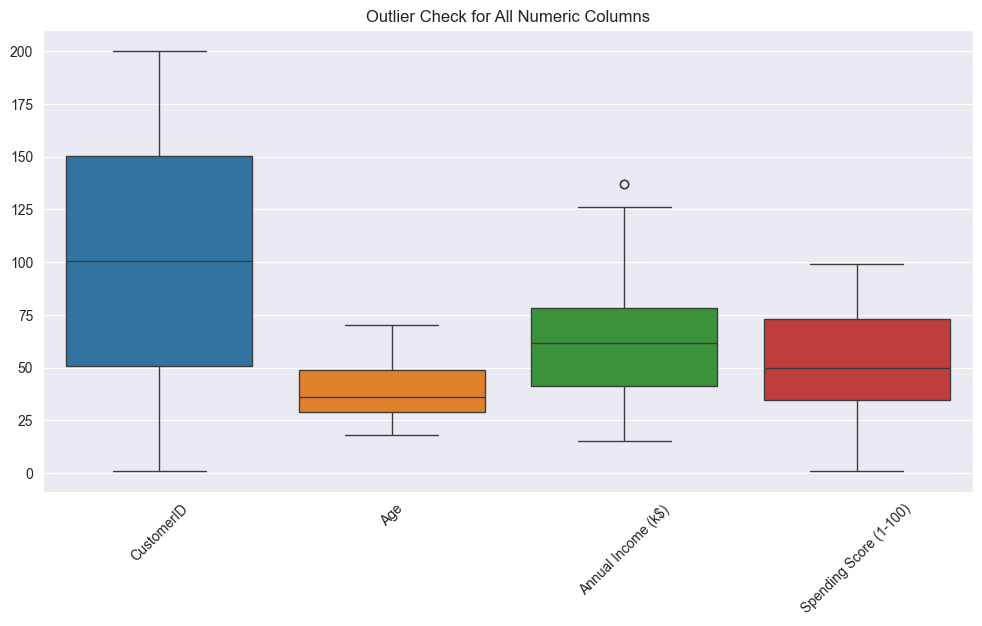

In [51]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=45)
plt.title("Outlier Check for All Numeric Columns")
plt.show()

In [52]:
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

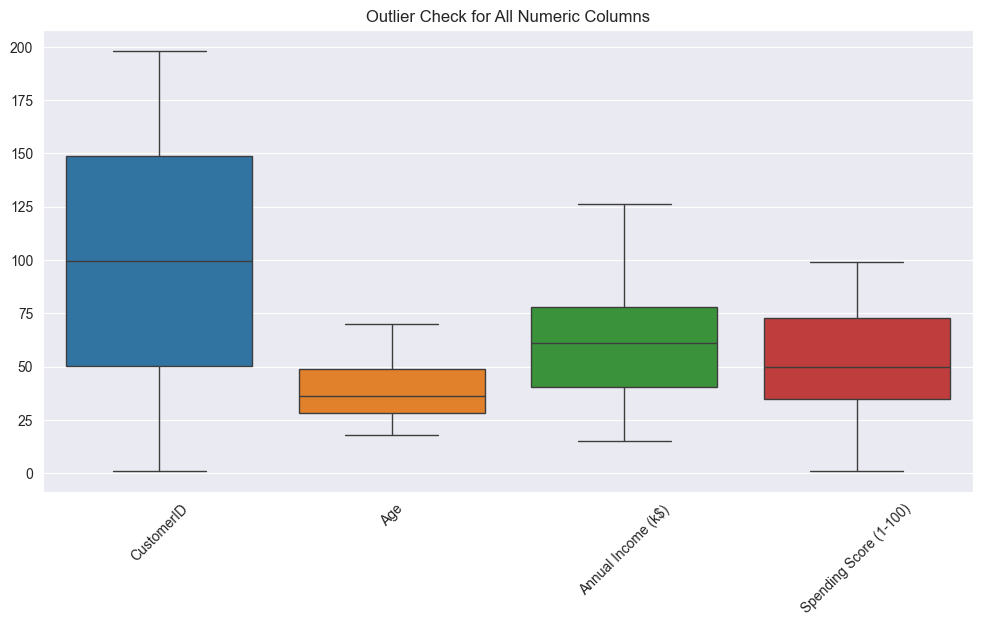

In [53]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=45)
plt.title("Outlier Check for All Numeric Columns")
plt.show()

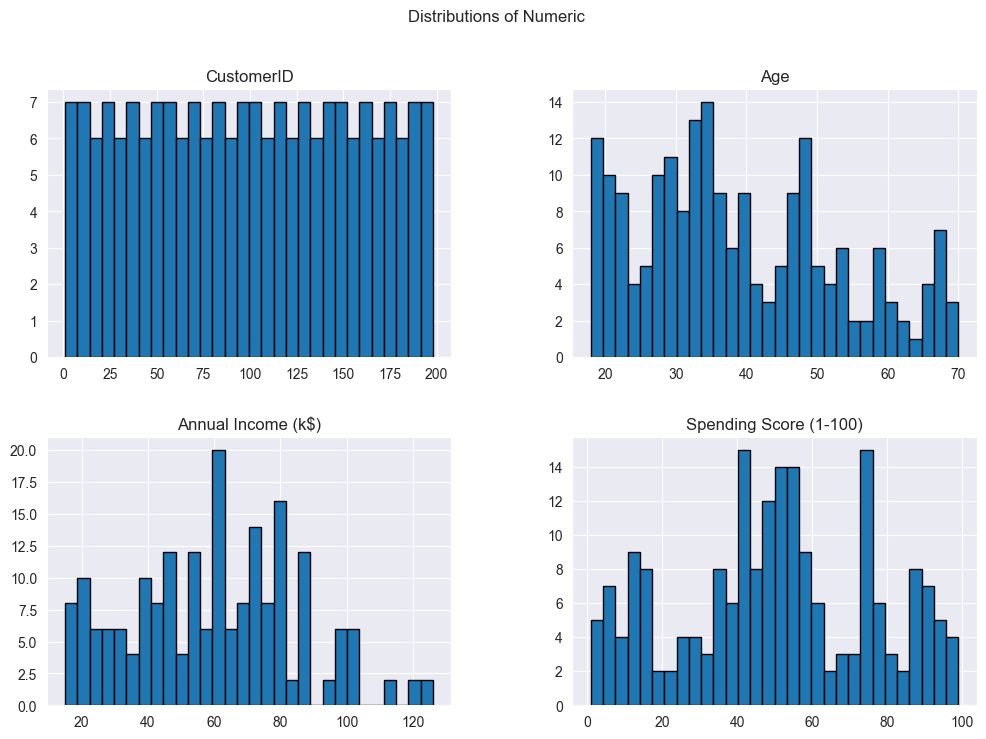

In [54]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns
data[numeric_cols].hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numeric")
plt.show()

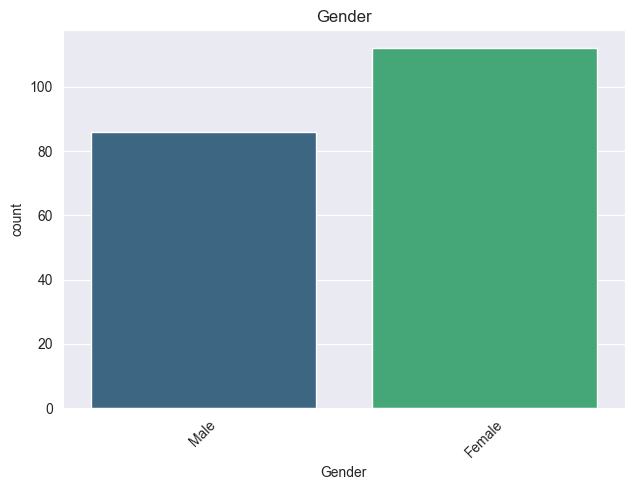

In [55]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
n = len(categorical_cols)
rows = -(-n // 3)   
plt.figure(figsize=(18, 5*rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(data=data, x=col, hue=col, palette="viridis", legend=False)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


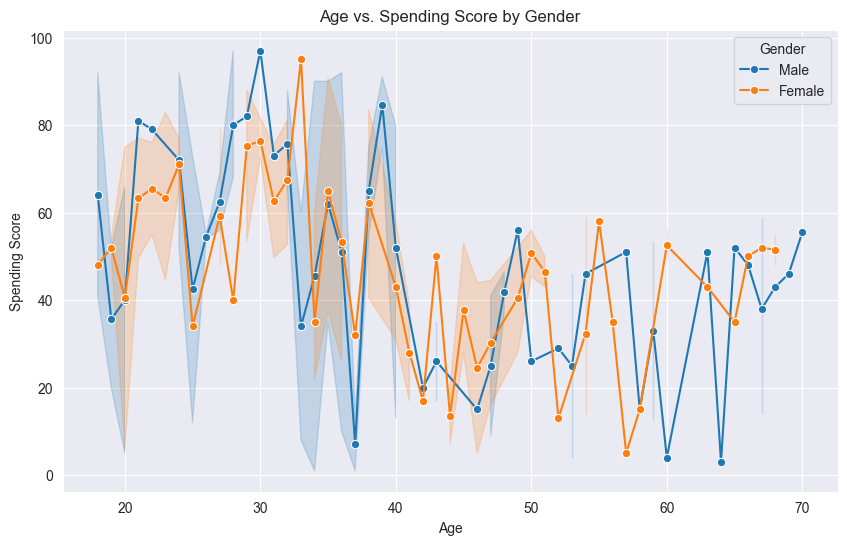

In [56]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Age", y="Spending Score (1-100)", hue="Gender", marker="o")
plt.title("Age vs. Spending Score by Gender")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()

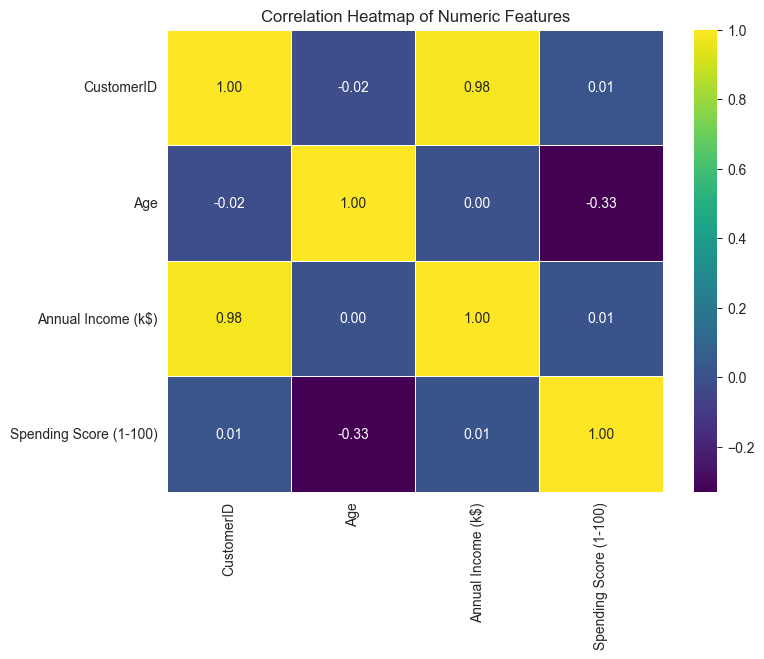

In [57]:
plt.figure(figsize=(8,6))
corr = data.corr(numeric_only=True)   # correlation between numeric columns
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [58]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

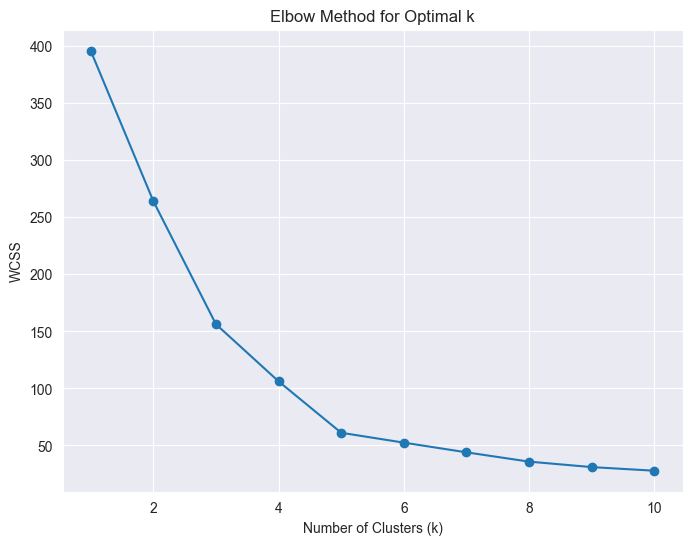

In [61]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data[:, 1:3])   
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

In [63]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data.loc[:, 'Cluster'] = kmeans.fit_predict(scaled_data[:, 1:3])

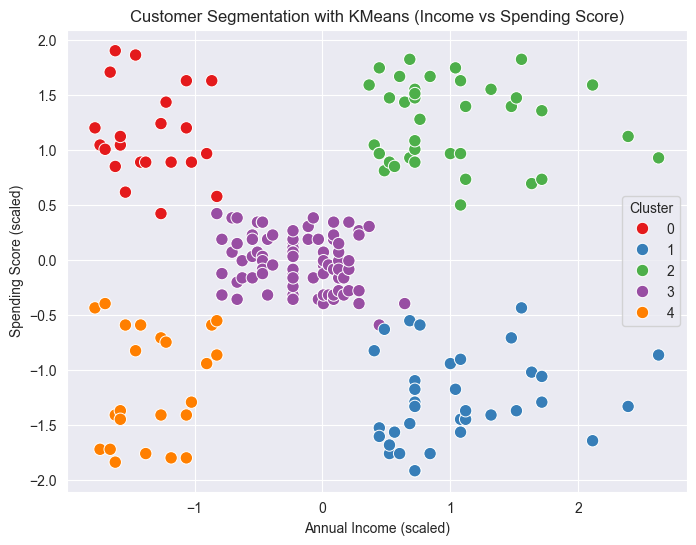

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_data[:,1],  
    y=scaled_data[:,2],  
    hue=data['Cluster'],
    palette="Set1",
    s=80
)
plt.title("Customer Segmentation with KMeans (Income vs Spending Score)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend(title="Cluster")
plt.show()

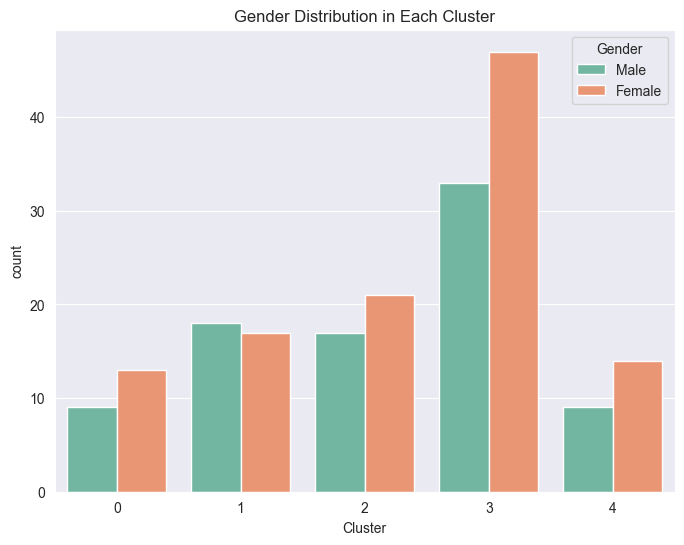

In [65]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x="Cluster", hue="Gender", palette="Set2")
plt.title("Gender Distribution in Each Cluster")
plt.show()